In [1]:
# ✅ Instalar dependencias si es necesario

In [2]:
!pip install pandas scikit-learn matplotlib seaborn ray optuna deap

In [3]:
# ✅ Ajustar path para importar desde src/

In [32]:
# ✅ Ajustar path para importar desde src/
import sys
from pathlib import Path

# Ir desde notebooks/ hacia la raíz del proyecto
project_root = Path().resolve().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))


project_root


In [22]:
project_root

PosixPath('/home/mparraf/myprojects/ESpecialidadMachineLearning/Modulo4EvalMarcoParrra')

In [5]:
# ✅ Importar funciones y módulos del proyecto

In [44]:
from src.utils import preprocesar_datos_multiclase_cv
from src.visualizador_cv import visualizar_curva_roc, graficar_metricas_comparativas
from src.optimizador_ray_cv import optimizar_con_raytune_cv
from src.optimizador_genetico_cv import optimizar_con_genetico_cv
from src.modelos import crear_modelo_random_forest, entrenar_modelo_base
from src.evaluador import evaluar_modelo
import pandas as pd

In [16]:
# ✅ Definir hiperparámetros

In [17]:
NUM_TRIALS = 100
tuned_params = {
    "n_estimators": [50, 100, 150, 200, 300],
    "max_depth": [5, 10, 15, 20, 30],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

In [9]:
# ✅ Cargar y preprocesar datos

In [18]:
train_df = pd.read_csv("../data/Training.csv")
test_df = pd.read_csv("../data/Testing.csv")

X_train, y_train, scaler, label_encoder = preprocesar_datos_multiclase_cv(train_df, fit_scaler=True)
X_test, y_test, _, _ = preprocesar_datos_multiclase_cv(test_df, scaler=scaler, label_encoder=label_encoder)

resultados = []

In [11]:
# ✅ Ray Tune

In [ ]:
resultado_ray = optimizar_con_raytune_cv(X_train, y_train, NUM_TRIALS, tuned_params)
resultados.append(resultado_ray)

modelo_ray = crear_modelo_random_forest(**resultado_ray["mejores_parametros"])
modelo_ray.fit(X_train, y_train)
resultado_test_ray = evaluar_modelo("RayTune", modelo_ray, X_test, y_test, 0.0, resultado_ray["mejores_parametros"])
resultados.append(resultado_test_ray)

visualizar_curva_roc(y_test, resultado_test_ray["y_prob"], metodo="RayTune")

2025-07-10 23:05:46,442	INFO tune.py:613 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
[I 2025-07-10 23:05:46,448] A new study created in memory with name: optuna



⚡ Optimizando con Ray Tune (OptunaSearch)...
== Status ==
Current time: 2025-07-10 23:05:46 (running for 00:00:00.11)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 64.000: None | Iter 16.000: None | Iter 4.000: None | Iter 1.000: None
Logical resource usage: 1.0/16 CPUs, 0/0 GPUs
Result logdir: /tmp/ray/session_2025-07-10_22-47-23_400263_249829/artifacts/2025-07-10_23-05-46/train_ray_tune_cv_2025-07-10_23-05-46/driver_artifacts
Number of trials: 1/100 (1 PENDING)




RayActorError: The actor died unexpectedly before finishing this task.
	class_name: wrap_function.<locals>.ImplicitFunc
	actor_id: 0684f01a9cf777b3c369ef2001000000
	pid: 259887
	namespace: de2efcaa-6c68-4e80-90e8-c2fbcebc0197
	ip: 192.168.0.150
The actor is dead because its worker process has died. Worker exit type: SYSTEM_ERROR Worker exit detail: Worker exits unexpectedly. Worker exits with an exit code None. Traceback (most recent call last):
  File "python/ray/_raylet.pyx", line 1883, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 1984, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 1889, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 1830, in ray._raylet.execute_task.function_executor
  File "/home/mparraf/.conda/envs/especialidadmachinelearning/lib/python3.8/site-packages/ray/_private/function_manager.py", line 724, in actor_method_executor
    return method(__ray_actor, *args, **kwargs)
  File "/home/mparraf/.conda/envs/especialidadmachinelearning/lib/python3.8/site-packages/ray/_private/function_manager.py", line 636, in temporary_actor_method
    raise RuntimeError(
RuntimeError: The actor with name ImplicitFunc failed to import on the worker. This may be because needed library dependencies are not installed in the worker environment:

Traceback (most recent call last):
  File "/home/mparraf/.conda/envs/especialidadmachinelearning/lib/python3.8/site-packages/ray/_private/function_manager.py", line 675, in _load_actor_class_from_gcs
    actor_class = pickle.loads(pickled_class)
ModuleNotFoundError: No module named 'src'


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "python/ray/_raylet.pyx", line 2281, in ray._raylet.task_execution_handler
  File "python/ray/_raylet.pyx", line 2177, in ray._raylet.execute_task_with_cancellation_handler
  File "python/ray/_raylet.pyx", line 1832, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 1833, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 2071, in ray._raylet.execute_task
  File "python/ray/_raylet.pyx", line 1059, in ray._raylet.store_task_errors
  File "/home/mparraf/.conda/envs/especialidadmachinelearning/lib/python3.8/site-packages/ray/_private/function_manager.py", line 636, in temporary_actor_method
    raise RuntimeError(
RuntimeError: The actor with name ImplicitFunc failed to import on the worker. This may be because needed library dependencies are not installed in the worker environment:

Traceback (most recent call last):
  File "/home/mparraf/.conda/envs/especialidadmachinelearning/lib/python3.8/site-packages/ray/_private/function_manager.py", line 675, in _load_actor_class_from_gcs
    actor_class = pickle.loads(pickled_class)
ModuleNotFoundError: No module named 'src'

An unexpected internal error occurred while the worker was executing a task.

In [ ]:
# ✅ Modelo Base


🌲 Entrenando modelo base...

📊 Evaluación del modelo base:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         2
          16       1.

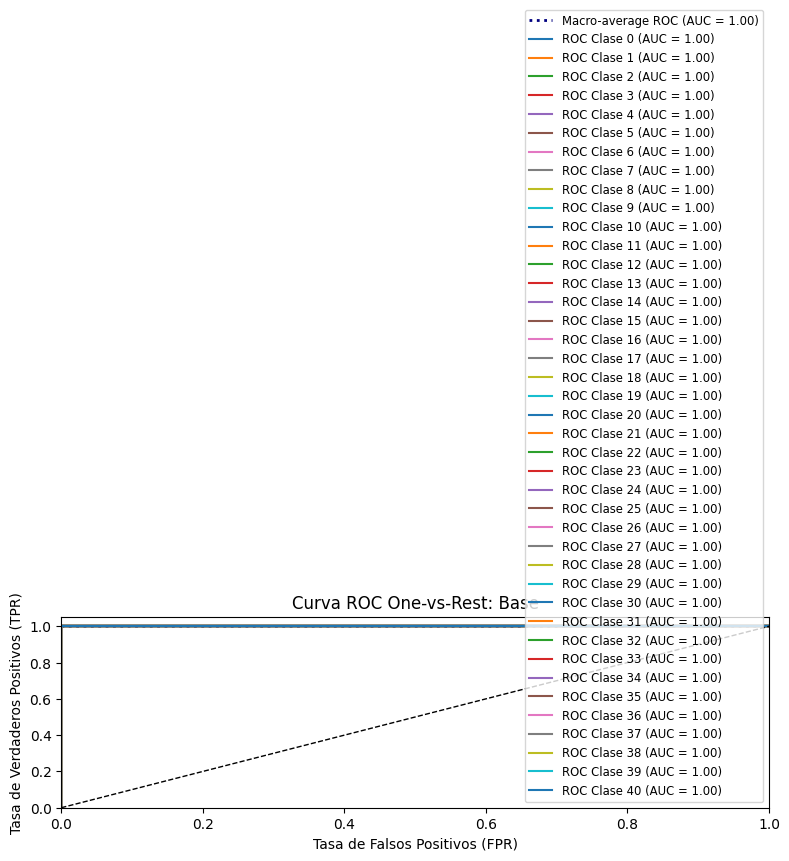

In [45]:
resultado_base = entrenar_modelo_base(X_train, y_train, X_test, y_test)
resultados.append(resultado_base)
visualizar_curva_roc(y_test, resultado_base["y_prob"], metodo="Base")

In [ ]:
# ✅ Genético

In [ ]:
resultado_gen = optimizar_con_genetico_cv(X_train, y_train, NUM_TRIALS, tuned_params)
modelo_gen = crear_modelo_random_forest(**resultado_gen["mejores_parametros"])
modelo_gen.fit(X_train, y_train)
resultado_test_gen = evaluar_modelo("Genético", modelo_gen, X_test, y_test, 0.0, resultado_gen["mejores_parametros"])
resultados.append(resultado_test_gen)
visualizar_curva_roc(y_test, resultado_test_gen["y_prob"], metodo="Genético")


🧬 Optimizando con Algoritmo Genético...
📊 Evolución: 100 generaciones con población de 40
📈 Generación 1 | F1 promedio: 0.9778 | F1 máx: 1.0000
📈 Generación 2 | F1 promedio: 0.9914 | F1 máx: 1.0000
📈 Generación 3 | F1 promedio: 0.9876 | F1 máx: 1.0000
📈 Generación 4 | F1 promedio: 0.9856 | F1 máx: 1.0000
📈 Generación 5 | F1 promedio: 0.9962 | F1 máx: 1.0000
📈 Generación 6 | F1 promedio: 0.9911 | F1 máx: 1.0000
📈 Generación 7 | F1 promedio: 0.9884 | F1 máx: 1.0000
📈 Generación 8 | F1 promedio: 0.9797 | F1 máx: 1.0000
📈 Generación 9 | F1 promedio: 0.9831 | F1 máx: 1.0000
📈 Generación 10 | F1 promedio: 0.9858 | F1 máx: 1.0000
📈 Generación 11 | F1 promedio: 0.9928 | F1 máx: 1.0000
📈 Generación 12 | F1 promedio: 0.9965 | F1 máx: 1.0000
📈 Generación 13 | F1 promedio: 0.9869 | F1 máx: 1.0000
📈 Generación 14 | F1 promedio: 0.9835 | F1 máx: 1.0000
📈 Generación 15 | F1 promedio: 0.9876 | F1 máx: 1.0000
📈 Generación 16 | F1 promedio: 0.9969 | F1 máx: 1.0000
📈 Generación 17 | F1 promedio: 0.9972 

In [ ]:
# ✅ Comparar resultados

In [ ]:
graficar_metricas_comparativas(resultados)

print("\n📈 Pipeline completado.")